# Analysis

### Import Dataset

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# original = pd.read_csv("./csv/2018_DATOS_AFOROS_NP_original.csv")
# df = original[original.iloc[:,7:].sum(axis = 1) > 0]

df = pd.read_csv("./csv/2018_DATOS_AFOROS_NP_filtered.csv")

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (23,24,27,28,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Dataset description

Our Dataset has speed measurements of vehicles passing by a set of points in Madrid's roads, and they are classified as light, heavy or 2-wheeled vehicles.

In [82]:
df.describe()

,Unnamed: 0,LATITUD,LONGITUD,HORA,TOTAL,VEHICULOS LIGEROS,VEHICULOS 2 RUEDAS,VEHICULOS PESADOS,VEHIC. DESCONOCIDO,VEL_0-10,...,VEHIC. 2 RUEDAS VEL_70-80,VEHIC. DESCONOCIDO VEL_70-80,VEHIC. 2 RUEDAS VEL_80-90,VEHIC. DESCONOCIDO VEL_80-90,VEHIC. 2 RUEDAS VEL_90-100,VEHIC. DESCONOCIDO VEL_90-100,VEHIC. 2 RUEDAS VEL_100-110,VEHIC. DESCONOCIDO VEL_100-110,Unnamed: 66,VEHIC. DESCONOCIDO VEL_100-110.1
count,22199.000000,22035.000000,22035.000000,22199.000000,22199.000000,22199.000000,22199.000000,22199.000000,22147.0,22147.000000,...,21938.000000,21938.0,21938.000000,21938.0,21938.000000,21938.0,21938.000000,21938.0,0.0,0.0
mean,249838.167305,40.417959,-3.697529,11.760485,121.911122,105.183071,11.125997,5.602054,0.0,1.157538,...,0.070335,0.0,0.017777,0.0,0.005470,0.0,0.003601,0.0,NaN,NaN
std,14013.016229,0.044282,0.049948,6.969854,145.276482,125.475845,22.653851,8.889073,0.0,4.064488,...,0.907654,0.0,0.157629,0.0,0.080269,0.0,0.067758,0.0,NaN,NaN
min,224785.000000,40.344518,-3.793202,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN
25%,238079.500000,40.389716,-3.718000,6.000000,20.000000,17.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN
50%,248094.000000,40.404056,-3.700131,12.000000,68.000000,59.000000,3.000000,2.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN
75%,263466.000000,40.442950,-3.672826,18.000000,170.000000,148.000000,11.000000,7.000000,0.0,1.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN
max,270732.000000,40.535485,-3.584695,23.000000,1249.000000,1033.000000,266.000000,152.000000,0.0,126.000000,...,83.000000,0.0,5.000000,0.0,3.000000,0.0,3.000000,0.0,NaN,NaN


In [84]:
def plot_corr(df, width = 15, height = 14):
    corr_matrix = df.corr()
    f = plt.figure(figsize=(width, height))
    plt.matshow(corr_matrix, fignum=f.number)
    plt.xticks(range(corr_matrix.shape[1]),corr_matrix.columns, fontsize=12, rotation=45)
    plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=12)
    plt.colorbar()
    plt.show()

In [85]:
aux =  np.isnan(df.corr().values[0])
corr_filter = np.invert(aux)

In [86]:
nan_columns = []
c = df.corr()
for x,y in zip(c.iloc[0],c.keys()):
    if np.isnan(x):
        nan_columns.append(y)

##  Resource naming Strategy

Our resource naming strategy will follow this format (this is an example)
`observation/observationId/locationId/latitude/length/date/2018-05-23/hour#14/vehicle#car/speed#70-80`


## Correlation matrix
Below we can see the correlation matrix across all the meaningfull variables in the dataset.
We can see that there are high correlations between similar velocities (20-30 is close to 30-40, 30-40 to 40-50 ,etc) both in normal vehicle speeds as well as across 2-wheeled vehicle speeds, which makes sense.


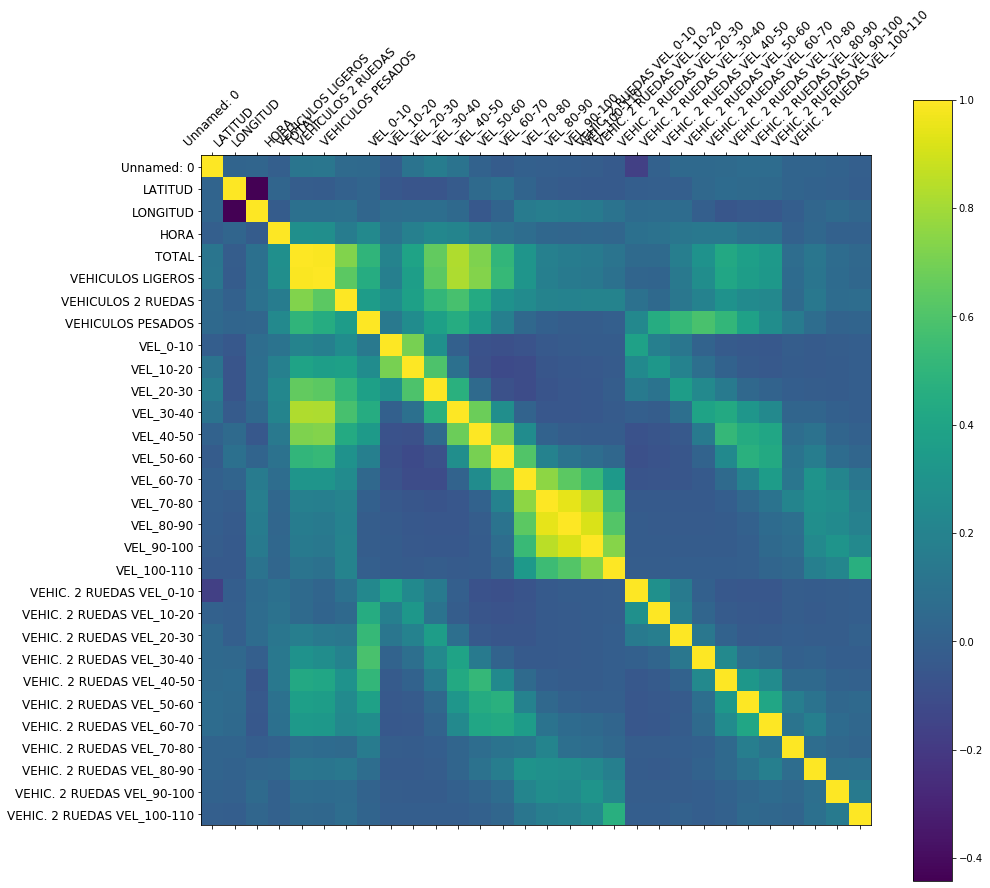

In [87]:
corr_list = [x for x in df.columns if x not in nan_columns]
plot_corr(df[corr_list])

In [117]:
df_clean = df[corr_list]

### 4 wheel vehicles speed distribution

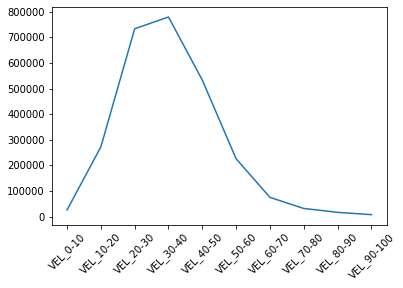

In [136]:
plt.xticks(rotation = 45)
plt.plot(vehicles_4w)

### 2 wheel vehicles speed distribution

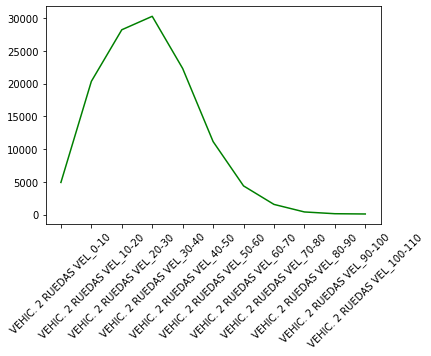

In [135]:
plt.xticks(rotation = 45)
plt.plot(vehicles_2w, "g-")

## Map of the points in Madrid where the measurements where made

In [88]:
import geopandas as gpd
from shapely.geometry import Point, Polygon


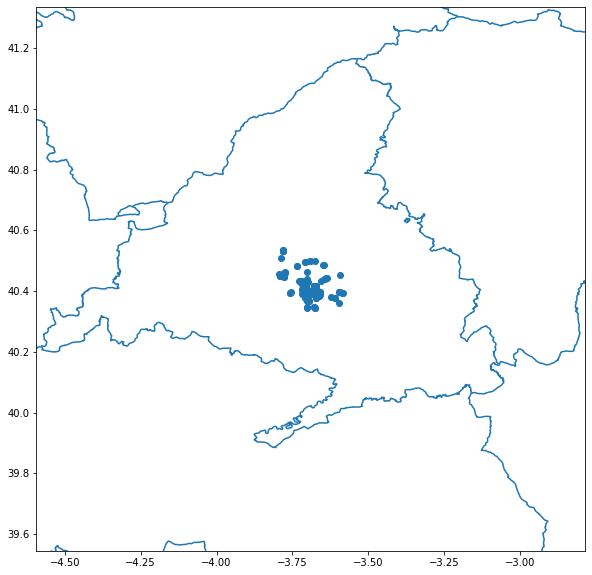

In [110]:
coordinates = df[["LATITUD","LONGITUD"]].groupby(['LATITUD','LONGITUD']).size().reset_index()
geometry = [Point(xy) for xy in zip(coordinates.LONGITUD, coordinates.LATITUD)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(coordinates, crs=crs, geometry=geometry)

#'./map/PORTAL_PK.shp'
spain_map = gpd.read_file('./map/peninsula/ll_provinciales_inspire_peninbal_etrs89.shp')
fig,ax = plt.subplots(figsize = (15,10))
minx, miny, maxx, maxy = gdf.total_bounds
zoomout = 0.8
ax.set_xlim(minx- zoomout, maxx + zoomout)
ax.set_ylim(miny - zoomout, maxy + zoomout)
spain_map.plot(ax = ax)
gdf.plot(ax = ax)